# Выполнил Артём Гаспарянц

Реализуем необходимые нам классы и алгоритмы

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class my_PCA():
    def __init__(self, n_components=None):
        self.n_components = n_components
    def fit(self, x):
        x -= np.mean(x, axis=(0, 1))
        C = np.dot(x.T, x)
        l, F = np.linalg.eig(C)
        self.F = F
        self.l = l

    def transform(self, X):
        if self.n_components:
            return np.dot(X, self.F)[:, :self.n_components]
        else:
            return np.dot(X, self.F)

In [5]:
# Скачаем датасет
from mnist import load_mnist
train, validation, test = load_mnist()

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


In [6]:
slice = 5000
X = np.array(train[0][:slice], dtype=np.float32)
X = np.reshape(X, (X.shape[0], 784))
labels = np.array(train[1][:slice], dtype=np.float32)

In [7]:
model = my_PCA() 
model.fit(X) 
components =  model.transform(X)

Text(0, 0.5, 'Величина собственного значения')

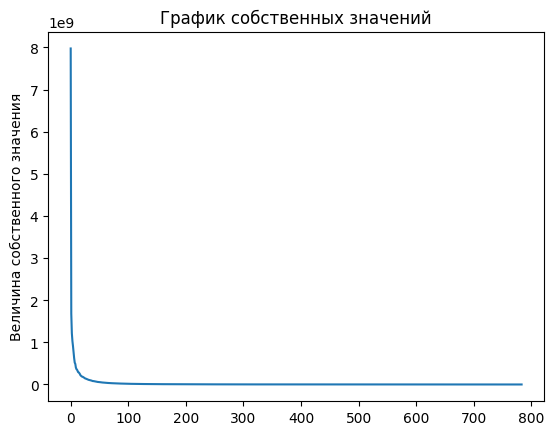

In [11]:
x = [i for i in range(len(model.l))]
plt.figure()
plt.plot(x, model.l)
plt.title("График собственных значений")
plt.ylabel('Величина собственного значения')

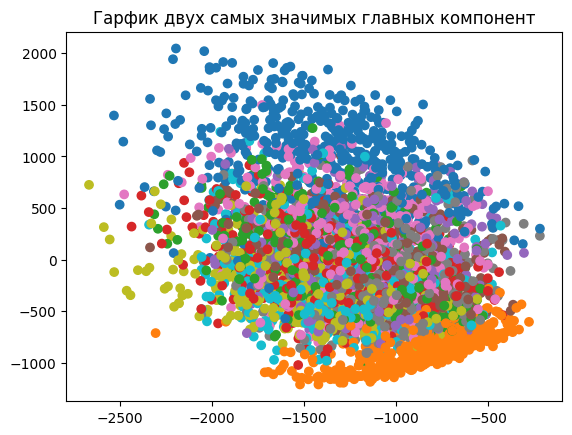

In [18]:
colors = ['red', 'blue', 'black', 'green', 'purple', 'orange', 'grey', 'brown', 'pink', 'violet']
plt.figure()
plt.scatter(components[:, 0], components[:, 1], cmap='tab10', c=labels)
plt.title('Гарфик двух самых значимых главных компонент')
plt.show()

In [57]:
class my_kNN():
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
    def fit(self, x, y):
        self.x = x
        self.y = y
    def predict(self, X):
        predict = []
        for x in X:
            distances = []
            for i in range(len(self.x)):
                distances.append([np.sqrt(np.sum(np.square(x - self.x[i]))), self.y[i]])
            nums = [0 for i in range(10)]
            distances.sort()
            for i in range(self.n_neighbors):
                nums[int(distances[i][1])] += 1
            mx = max(nums)
            predict.append(nums.index(mx))
        predict = np.array(predict)
        return predict


In [58]:
x_train, x_test, label_train, label_test = train_test_split(X, labels, test_size=0.2)

model = my_kNN(5)
model.fit(x_train, label_train)
predict = model.predict(x_test)

Точность при 5 соседях получилась:

In [60]:
accuracy_score(label_test, predict)

0.938

In [81]:
results = []
for i in (1, 5, 10, 20, 30, 40, 50, 60, 64):
    for j in range(1, 31):

        slice = 2500
        X = np.array(train[0][:slice], dtype=np.float32)
        X = np.reshape(X, (X.shape[0], 784))
        labels = np.array(train[1][:slice], dtype=np.float32)

        pca = my_PCA(i) 
        pca.fit(X) 
        components = pca.transform(X)

        x_train, x_test, label_train, label_test = train_test_split(components, labels, test_size=0.2)

        model = my_kNN(j)
        model.fit(x_train, label_train)
        predict = model.predict(x_test)

        results.append([accuracy_score(label_test, predict), i, j])

In [84]:
results.sort(reverse=True)
print(f'Лучший результат ({results[0][0]}) получился при количестве соседей - {results[0][2]} и компонент - {results[0][1]}')

Лучший результат (0.958) получился при количестве соседей - 9 и компонент - 40


Выполняя эту работу я познакомился с некоторыми алгоритмами, использующимися в машинном обучении